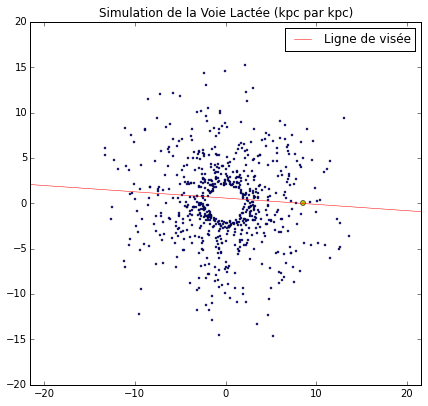

In [222]:
#Cette fonction simule la Voie Lactée en créant des points aléatoires (mais qui sont plus probables d'apparaître autour du centre de masse) et le système Solaire distant de 8.5 kpc représenté par la point jaune.
from pylab import *
%matplotlib inline
import numpy as np
import random
from random import randrange
fig = plt.figure()
fig.set_size_inches(7, 6.5)
axis("equal")
def galaxie_alé():    
    x = linspace(-50, 50, 100)
    xlim(-20, 20)
    ylim(-20,20)
    plot(8.5, 0, "yo", ms=5)
    L = []
    #On crée 700 points 
    for i in range(700):
        a = 2*pi*random.random() #a correspond à l'angle
        c = ((random.random()*random.random())*15)+2 #c correspond à la distance entre le centre le masse et le point aléatoire, le fait de multiplier 15 par 3 nombres aléatoires compris entre 0 et 1 augmente les chances de retrouver les point très proches du centre de masse.
        z = (a, c)
        L.append(z)
        #On crée un tableau qui contient les coordonnés polaires des différents points
        plot(c*cos(a), c*sin(a), 'bo', ms=2)
    #On définit la fonction Y qui caractérise la ligne de visée avec un angle de 36 degrés
    Y = (-sin(0.63)*x/8.5)+sin(0.63)
    plot(x, Y, 'r-', linewidth=0.5, label="Ligne de visée")
    plt.title("Simulation de la Voie Lactée (kpc par kpc)")
    plt.legend()
    show()
    return L
L = galaxie_alé()

C:\Python34\lib\site-packages\ipykernel\__main__.py:10: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


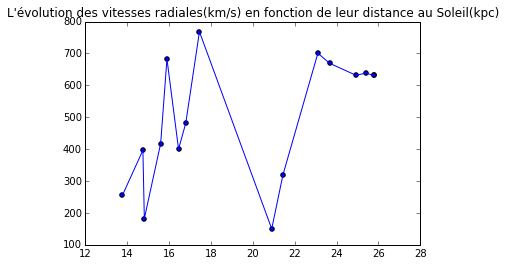

In [226]:
x = linspace(-50, 50, 100)
Y = (-sin(0.63)*x/8.5)+sin(0.63)
v0 = 7.1297e-15 #vitesse du soleil en kpc
D= dict()

#On suppose que les galaxies et les nuages de gazs possèdent la même vitesse circulaire que le Soleil; donc V0 = V = 250 km/s

def courbe():
    for z in L: 
        if abs(z[1]*sin(z[0])-Y[z[1]*cos(z[0])])<=0.25: 
#Explication : A ce moment précis, la fonction vérifie si la valeur absolue de la différence entre l'ordonnée du point et Y de l'abscisse de ce point est inférieure à une certaine erreur qui est ici de 0.25 (après plusieurs essais, on a trouvé que cette erreur correspondait bien aux faits du schéma)
            d = sqrt((8.5)**2)+((z[1]*sin(z[0]))**2)
            vR = (((v0*8.5)/(z[1]*sin(0.63)))-(v0*sin(0.63)))*3.086e16 #Calcul de la vitesse radiale en km/s en prenant l = 0.63 rad(36 dégrés)
            D[d] = vR
#Ainsi, on crée un dictionnaire qui associe à chaque distance au Soleil, une valeur de la vitesse radiale en km/s
    return D
#La fonction ci-dessous donne l'évolution de la vitesse radiale des points d'intersections avec la ligne de visée en fonction de leur distance en kpc par rapport au Soleil"
def courbe2():
    D = courbe()
    LL = []
    KK = []
    for d in D:
        LL.append(d)
    for i in sorted(LL):
        KK.append(D[i])
    plt.scatter(sorted(LL), KK)
    plot(sorted(LL),KK)
    plt.title("L'évolution des vitesses radiales(km/s) en fonction de leur distance au Soleil(kpc)")
    show()

courbe2()
